In [121]:
cd data6

[Errno 2] No such file or directory: 'data6'
/home/rajan/Desktop/EDA task/FridaySale/data6


Cleaning and preparing the data for model training

In [122]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [173]:
#importing all the data
df_train = pd.read_csv('blackFriday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [174]:
#importing the test data
df_test = pd.read_csv('blackFriday_test.csv')

In [125]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [126]:
#appending both test and train data
final_data= df_train.append(df_test)

/tmp/ipykernel_85472/2902155161.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data= df_train.append(df_test)


In [127]:
final_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [128]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [129]:
final_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [130]:
#dropping unnecessary features
final_data.drop(['User_ID'],axis = 1, inplace= True)

In [131]:
final_data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Encoding Categorical Data

In [132]:
#Encoding Gender
final_data['Gender']= final_data['Gender'].map({'F':1, 'M':0})

In [133]:
final_data

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,1,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,1,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,1,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,1,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [134]:
final_data.groupby('Age').size()

Age
0-17      21334
18-25    141953
26-35    313015
36-45    156724
46-50     65278
51-55     54784
55+       30579
dtype: int64

In [135]:
#Encoding age
final_data['Age'] = final_data['Age'].map({'0-17':0, '18-25':1,'26-35':3, '36-45':4,'46-50':5,'55+':6})

In [136]:
final_data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0.0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0.0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0.0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0.0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,6.0,16,C,4+,0,8,NaN,NaN,7969.0


In [137]:
final_data.groupby(['City_Category']).size()

City_Category
A    210244
B    329739
C    243684
dtype: int64

In [138]:
#Encoding City Category
final_data['City_Category']= final_data['City_Category'].map({'A':0, 'B':1, 'C':2})

In [139]:
final_data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0.0,10,0,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0.0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0.0,10,0,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0.0,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,0,6.0,16,2,4+,0,8,NaN,NaN,7969.0


In [140]:
final_data.isnull().sum()

Product_ID                         0
Gender                             0
Age                            54784
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

# Replacing Missing Values

In [141]:
final_data['Product_Category_2']= final_data['Product_Category_2'].fillna(final_data['Product_Category_2'].mode()[0])

In [142]:
final_data['Product_Category_2'].mode().values

array([8.])

In [143]:
final_data['Product_Category_2']

0          8.0
1          6.0
2          8.0
3         14.0
4          8.0
          ... 
233594     8.0
233595     8.0
233596     5.0
233597    16.0
233598     5.0
Name: Product_Category_2, Length: 783667, dtype: float64

In [144]:
#for product Category-3

In [145]:
final_data['Product_Category_3']= final_data['Product_Category_3'].fillna(final_data['Product_Category_3'].mode()[0])

In [146]:
final_data.isnull().sum()

Product_ID                         0
Gender                             0
Age                            54784
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [147]:
final_data.shape

(783667, 11)

In [148]:
final_data.groupby(['Stay_In_Current_City_Years']).size()

Stay_In_Current_City_Years
0     105716
1     276425
2     145427
3     135428
4+    120671
dtype: int64

In [149]:
final_data['Stay_In_Current_City_Years'] = final_data['Stay_In_Current_City_Years'].str.replace('+',' ')

/tmp/ipykernel_85472/923036013.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_data['Stay_In_Current_City_Years'] = final_data['Stay_In_Current_City_Years'].str.replace('+',' ')


In [150]:
final_data

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0.0,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,1,0.0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0.0,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,1,0.0,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,0,6.0,16,2,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,1,3.0,15,1,4,1,8,8.0,16.0,NaN
233595,P00254642,1,3.0,15,1,4,1,5,8.0,16.0,NaN
233596,P00031842,1,3.0,15,1,4,1,1,5.0,12.0,NaN
233597,P00124742,1,5.0,1,2,4,0,10,16.0,16.0,NaN


In [151]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         728883 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 71.7+ MB


In [153]:
#Converting Object into integer
final_data['Stay_In_Current_City_Years'] = final_data['Stay_In_Current_City_Years'].astype(int)

In [154]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         728883 non-null  float64
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 71.7+ MB


In [157]:
final_data.isnull().sum()

Product_ID                         0
Gender                             0
Age                            54784
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

# Replacing null value of Age with mean

In [161]:
final_data['Age'] = final_data['Age'].fillna(final_data['Age'].median())

In [162]:
final_data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

# Visualization

/home/rajan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

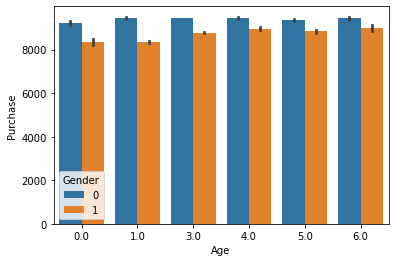

In [166]:
sns.barplot('Age','Purchase',hue = 'Gender', data = final_data)

Observation: Male has higher purchase than that of female. The purchasing tendency is same for all group of age.

/home/rajan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

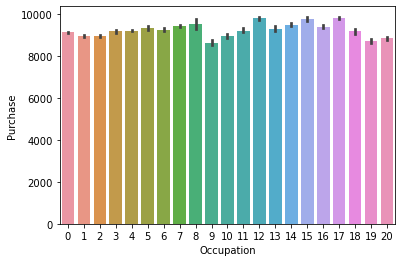

In [168]:
#visualization of purchase with occupation
sns.barplot('Occupation', 'Purchase', data = final_data)

Observation: All occupation has a  same tendency of buying